# Titanic Dataset

## Decision Tree Classification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tit_df = pd.read_csv(r'C:\Users\Ayush Yadav\Desktop\PYFe\Untitled Folder\Data\ML data\titanic.csv')

In [3]:
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
tit_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [6]:
main_df = tit_df.drop(['Name','Ticket','Cabin','Embarked'], axis=1)

In [7]:
main_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [11]:
main_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [15]:
main_df.dropna(axis=0, inplace= True)

In [16]:
inputs = main_df.drop(['Survived'], axis='columns')
inputs

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,male,22.0,1,0,7.2500
1,2,1,female,38.0,1,0,71.2833
2,3,3,female,26.0,0,0,7.9250
3,4,1,female,35.0,1,0,53.1000
4,5,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,3,female,39.0,0,5,29.1250
886,887,2,male,27.0,0,0,13.0000
887,888,1,female,19.0,0,0,30.0000
889,890,1,male,26.0,0,0,30.0000


In [17]:
inputs.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [31]:
target = main_df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In inputs dataframe we have sex columns which has string values so we need to converst these values to int values by LabelEncoder 

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le_Sex = LabelEncoder()

In [21]:
inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])

In [22]:
inputs.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_n
0,1,3,male,22.0,1,0,7.2500,1
1,2,1,female,38.0,1,0,71.2833,0


In [23]:
inputs_n = inputs.drop(['Sex'], axis='columns')

In [24]:
inputs_n

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_n
0,1,3,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
885,886,3,39.0,0,5,29.1250,0
886,887,2,27.0,0,0,13.0000,1
887,888,1,19.0,0,0,30.0000,0
889,890,1,26.0,0,0,30.0000,1


In [25]:
from sklearn.model_selection import train_test_split

In [32]:
train_x, test_x, train_y, test_y = train_test_split(inputs_n, target, test_size=0.2 )

In [33]:
train_x.shape

(571, 7)

In [34]:
train_y.shape

(571,)

In [29]:
from sklearn import tree

In [36]:
model = tree.DecisionTreeClassifier()

In [37]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [38]:
model.score(test_x,test_y)

0.8041958041958042

In [50]:
inputs_n.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_n
0,1,3,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,3,35.0,0,0,8.0500,1


In [58]:
model.predict([[5,3,35.0,0,0,8.0500,1]])

array([0], dtype=int64)

In [42]:
y_predicted = model.predict(test_x)

# Confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(test_y, y_predicted)
cm

array([[78, 13],
       [15, 37]], dtype=int64)

In [44]:
import seaborn as sns

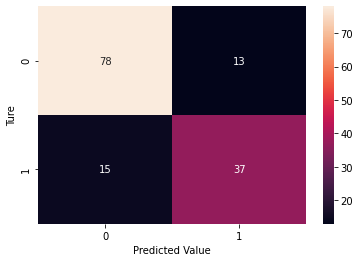

<Figure size 504x504 with 0 Axes>

In [59]:
sns.heatmap(cm,annot= True)
plt.xlabel('Predicted Value')
plt.ylabel('Ture')

plt.figure(figsize=(7,7));